In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import operator
%matplotlib inline  
import time


In [6]:
#importo database
df1 = pd.read_csv("backup_all_20-03.csv", sep=",")
df1.columns = ['ID1','ID2','MAC2','rssi','ismobile','timestamp','milliseconds']
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1.dtypes

ID1                     object
ID2                     object
MAC2                    object
rssi                   float64
ismobile                  bool
timestamp       datetime64[ns]
milliseconds             int64
dtype: object

In [7]:
df1.head()

ID1                               ID2  \
0  dae005540b55e2ce0f48ea8bb7d89892  11be1f8974a5910983ecefc406c45cf3   
1  dae005540b55e2ce0f48ea8bb7d89892  96a323c26b9af033e7914b197f2fa436   
2  cb7ca5b49a341d13814143ae0127e310  dae005540b55e2ce0f48ea8bb7d89892   
3  cb7ca5b49a341d13814143ae0127e310  96a323c26b9af033e7914b197f2fa436   
4  cb7ca5b49a341d13814143ae0127e310  41f62b3a40bd99304d41ebfc0837008d   

                MAC2  rssi  ismobile           timestamp   milliseconds  
0  64:A2:F9:31:CB:EC -79.0      True 2019-03-13 11:50:09  1552474209871  
1  18:CF:5E:F6:5B:75 -64.0      True 2019-03-13 11:50:15  1552474215199  
2  98:0C:A5:C5:1E:58 -70.0      True 2019-03-13 11:50:17  1552474217194  
3  18:CF:5E:F6:5B:75 -84.0      True 2019-03-13 11:50:17  1552474217660  
4  B0:55:08:79:16:DD -89.0      True 2019-03-13 11:50:17  1552474217664

In [8]:
df1.describe()

rssi  milliseconds
count  27107.000000  2.710700e+04
mean     -71.577379  1.552886e+12
std       13.926121  2.031752e+08
min     -106.000000  1.552474e+12
25%      -79.000000  1.552576e+12
50%      -73.000000  1.553007e+12
75%      -65.000000  1.553007e+12
max       20.000000  1.553093e+12

In [9]:
devices = df1.ID1.unique().tolist()
print(devices)
dfA = df1[df1.ID1 == devices[-1]]
print(devices[-1])
dfA.head()
dfA.ID2.unique()

['dae005540b55e2ce0f48ea8bb7d89892', 'cb7ca5b49a341d13814143ae0127e310', '6902dfb0d5d7b41fa027438e9828487f', '607217d83721d6b95a426d9ecab7573b', '81b47bd7422cc65962034bf1c51ce577', 'e9f20609bead4b7ed0443c474fa6fb72', '072b2ddcba3705a3c740fca564dad42c', '2aa94b17f8f3162c', '03d2fad7913f3ee053f5e5cdd3617268']
03d2fad7913f3ee053f5e5cdd3617268


array(['1bfdb71e83ea967bf305871624a06ec7',
       '41f62b3a40bd99304d41ebfc0837008d',
       'dae005540b55e2ce0f48ea8bb7d89892',
       '11be1f8974a5910983ecefc406c45cf3',
       'fa310902458b52ade1a0ccf655465100',
       '50703070af6470b924ea68523238ff48',
       '5a89a6a010f95fb41b3d6456f8ed2b6d', 'LSWatch',
       '7fb4ae3cbd2ea01269d1d4d11803a738', 'Forerunner 35',
       '96a323c26b9af033e7914b197f2fa436', 'MI Band 2',
       '6902dfb0d5d7b41fa027438e9828487f', 'Forerunner 645 Music',
       'LE-reserved_C', 'ID115Plus HR', 'LE-Storm Chaser',
       'LE-Bose SoundSport Free', 'LE-reserved_T',
       '9dea77a54232cb8c8aeacb697a4b4705'], dtype=object)

In [18]:
ot = 12

matrix = dfA[(dfA.ID2 == dfA.ID2.unique()[ot])]
print(matrix)

                                    ID1                               ID2  \
8870   03d2fad7913f3ee053f5e5cdd3617268  6902dfb0d5d7b41fa027438e9828487f   
8878   03d2fad7913f3ee053f5e5cdd3617268  6902dfb0d5d7b41fa027438e9828487f   
8882   03d2fad7913f3ee053f5e5cdd3617268  6902dfb0d5d7b41fa027438e9828487f   
8893   03d2fad7913f3ee053f5e5cdd3617268  6902dfb0d5d7b41fa027438e9828487f   
8904   03d2fad7913f3ee053f5e5cdd3617268  6902dfb0d5d7b41fa027438e9828487f   
8917   03d2fad7913f3ee053f5e5cdd3617268  6902dfb0d5d7b41fa027438e9828487f   
8925   03d2fad7913f3ee053f5e5cdd3617268  6902dfb0d5d7b41fa027438e9828487f   
8962   03d2fad7913f3ee053f5e5cdd3617268  6902dfb0d5d7b41fa027438e9828487f   
8963   03d2fad7913f3ee053f5e5cdd3617268  6902dfb0d5d7b41fa027438e9828487f   
8993   03d2fad7913f3ee053f5e5cdd3617268  6902dfb0d5d7b41fa027438e9828487f   
8994   03d2fad7913f3ee053f5e5cdd3617268  6902dfb0d5d7b41fa027438e9828487f   
8997   03d2fad7913f3ee053f5e5cdd3617268  6902dfb0d5d7b41fa027438e9828487f   

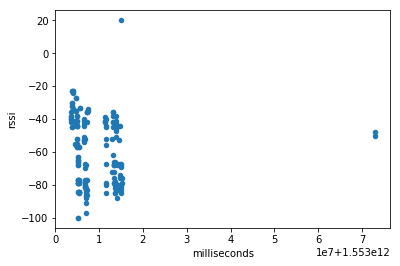

In [15]:
matrix.plot.scatter(x='milliseconds', y='rssi')


In [16]:
print(dfA.ID2.unique()[ot])

6902dfb0d5d7b41fa027438e9828487f


In [35]:
rssi = dfA[(dfA.ID2 == dfA.ID2.unique()[ot]) & (dfA.timestamp >= '2019-03-13 12:19:00') ].rssi.tolist()
milliseconds = dfA[(dfA.ID2 == dfA.ID2.unique()[ot]) & (dfA.timestamp >= '2019-03-13 12:19:30') ].milliseconds.tolist()

In [36]:
print(rssi)
print(milliseconds)

[-42.0, -40.0, -38.0, -39.0, -36.0, -40.0, -41.0, -45.0, -45.0, -30.0, -30.0, -32.0, -32.0, -23.0, -23.0, -23.0, -23.0, -34.0, -34.0, -24.0, -55.0, -42.0, -42.0, -27.0, -27.0, -56.0, -56.0, -35.0, -35.0, -41.0, -41.0, -42.0, -42.0, -43.0, -43.0, -41.0, -41.0, -42.0, -42.0, -44.0, -44.0, -44.0, -44.0, -41.0, -41.0, -38.0, -38.0, -57.0, -57.0, -55.0, -55.0, -52.0, -52.0, -65.0, -65.0, -84.0, -84.0, -77.0, -77.0, -63.0, -63.0, -66.0, -66.0, -68.0, -68.0, -77.0, -77.0, -100.0, -100.0, -79.0, -79.0, -79.0, -79.0, -84.0, -84.0, -57.0, -57.0, -84.0, -84.0, -78.0, -78.0, -79.0, -79.0, -85.0, -85.0, -77.0, -77.0, -33.0, -33.0, -54.0, -43.0, -51.0, -44.0, -40.0, -41.0, -53.0, -53.0, -52.0, -81.0, -80.0, -67.0, -78.0, -70.0, -80.0, -77.0, -81.0, -97.0, -91.0, -77.0, -84.0, -88.0, -82.0, -68.0, -87.0, -86.0, -83.0, -83.0, -83.0, -86.0, -77.0, -36.0, -36.0, -42.0, -36.0, -34.0, -35.0, -39.0, -42.0, -41.0, -42.0, -40.0, -45.0, -52.0, -44.0, -80.0, -79.0, -67.0, -56.0, -85.0, -72.0, -52.0, -36.0, -38

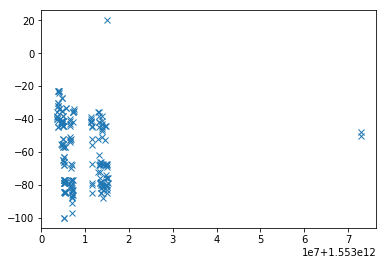

In [34]:
plt.plot(milliseconds[1:],rssi[1:],'x')